# Habit Tracker Analyzer
This notebook loads and analyzes your habit data from `habits_apr.28-may.8.csv` using basic pandas and visualization techniques.

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set up visual style
sns.set(style='whitegrid')

In [3]:
# Load the habit tracking CSV
filepath = '../data/habits_apr.28-may.8.csv'
df = pd.read_csv(filepath)
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.head()

,Date,Walk,Resistance Training,Yoga,Notes
0,2025-04-22,Yes,No,Yes,15 walk outside
1,2025-04-23,Yes,Yes,No,Did 10 counter pushups; 30 min treadmill walk
2,2025-04-24,No,No,No,NaN
3,2025-04-25,No,No,Yes,Short yoga sequence before bed
4,2025-04-26,Yes,Yes,No,30 min walk; 10 counter pushups and a few resi...


In [28]:
# Basic summary: total days, habits, and completion rates
habit_cols = df.columns.drop(['Date', 'Notes'])  # Exclude 'Notes' column
completion_rates = df[habit_cols].map(lambda x: 1 if x == 'Yes' else 0).mean() * 100  # Convert 'Yes'/'No' to 1/0
completion_rates.round(2)

Walk                                        50.0
Resistance Training                         25.0
Yoga                                        25.0
Total Completed                              0.0
Walk_streak                                  0.0
Resistance Training_streak                   0.0
Yoga_streak                                  0.0
Week                                         0.0
Total Completed_streak                       0.0
Walk_streak_streak                           0.0
Resistance Training_streak_streak            0.0
Yoga_streak_streak                           0.0
Week_streak                                  0.0
Total Completed_streak_streak                0.0
Walk_streak_streak_streak                    0.0
Resistance Training_streak_streak_streak     0.0
Yoga_streak_streak_streak                    0.0
Week_streak_streak                           0.0
dtype: float64

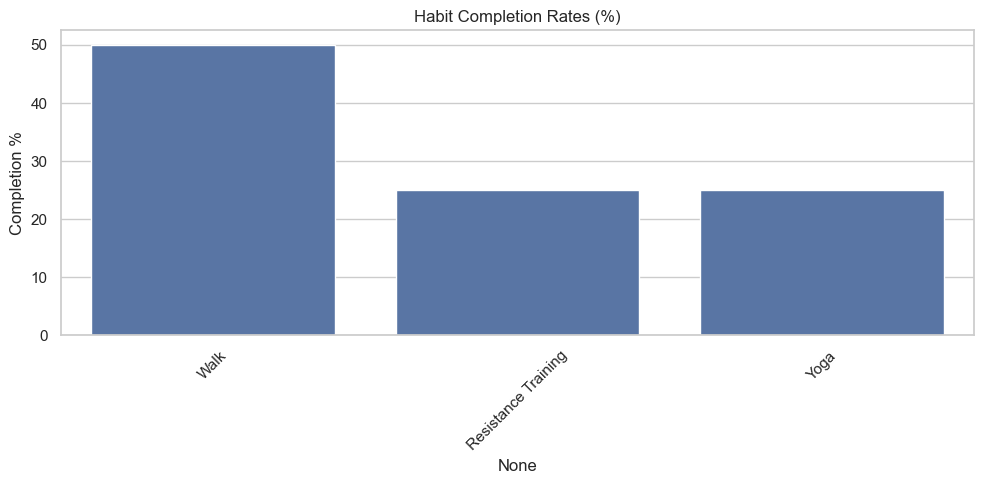

In [6]:
# Plot habit completion rates
plt.figure(figsize=(10,5))
sns.barplot(x=completion_rates.index, y=completion_rates.values)
plt.title('Habit Completion Rates (%)')
plt.ylabel('Completion %')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

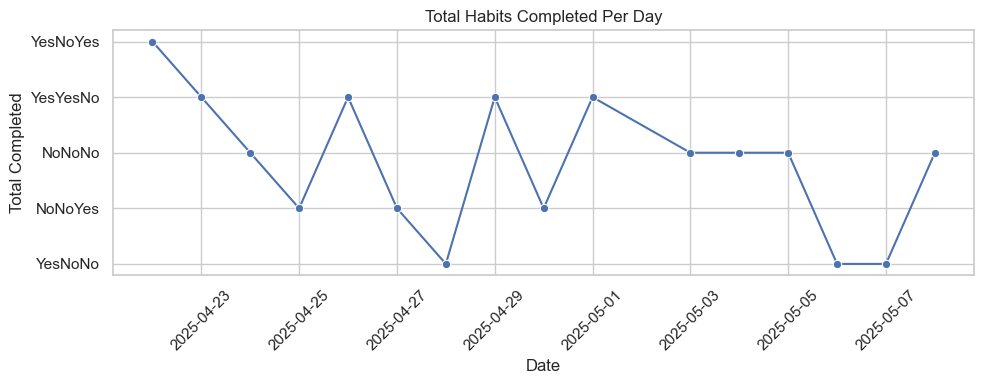

In [7]:
# Plot daily completions over time
df['Total Completed'] = df[habit_cols].sum(axis=1)
plt.figure(figsize=(10,4))
sns.lineplot(x='Date', y='Total Completed', data=df, marker='o')
plt.title('Total Habits Completed Per Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

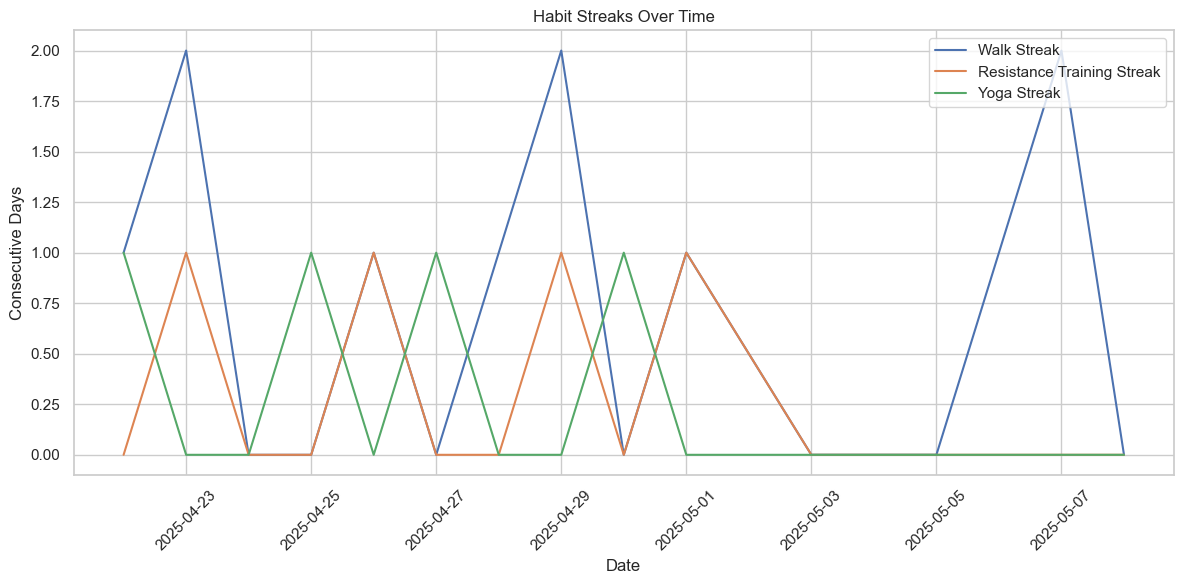

In [20]:
# Plot number of consecutive days completed for each habit
def calculate_streaks(series):
    streaks = []
    current_streak = 0
    for value in series:
        if value == "Yes":
            current_streak += 1
        else:
            current_streak = 0
        streaks.append(current_streak)
    return streaks

for col in habit_cols:
    df[f'{col}_streak'] = calculate_streaks(df[col])

plt.figure(figsize=(12, 6))
for col in habit_cols:
    plt.plot(df['Date'], df[f'{col}_streak'], label=f'{col} Streak')

plt.xlabel('Date')
plt.ylabel('Consecutive Days')
plt.title('Habit Streaks Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [19]:
#Plot max streaks for each habit
max_streaks = {col: df[f'{col}_streak'].max() for col in habit_cols}
print("Max streaks:")
for habit, streak in max_streaks.items():
    print(f"{habit}: {streak} days")


Max streaks:
Walk: 2 days
Resistance Training: 1 days
Yoga: 1 days


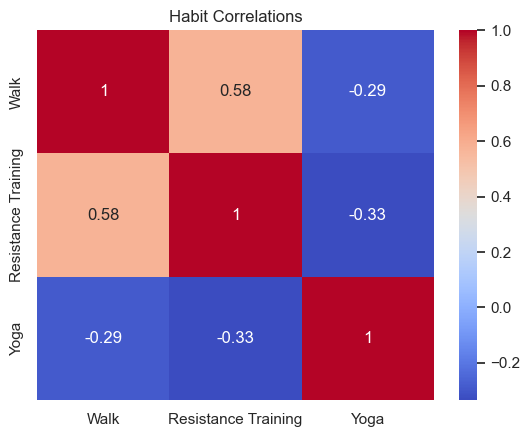

In [13]:
# Plot habit correlations
binary_df = df[habit_cols].map(lambda x: 1 if x == "Yes" else 0)
correlation_matrix = binary_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Habit Correlations")
plt.show()


In [14]:
# Weekly Goal Comparison
# Example: Set a weekly goal for each habit
weekly_goals = {'Walk': 5, 'Resistance Training': 3, 'Yoga': 4}

# Add a week column
df['Week'] = df['Date'].dt.isocalendar().week

# Count habits per week
weekly_summary = binary_df.copy()
weekly_summary['Week'] = df['Week']
weekly_totals = weekly_summary.groupby('Week').sum()

# Compare to goals
goal_comparison = weekly_totals.subtract(pd.Series(weekly_goals), axis='columns')
print(goal_comparison)


      Walk  Resistance Training  Yoga
Week                                 
17      -2                   -1    -1
18      -2                   -1    -3
19      -3                   -3    -4


In [15]:
# Notes Column Sentiment Analysis
from sklearn.feature_extraction.text import CountVectorizer

notes = df['Notes'].dropna()
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(notes)
keywords = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
top_keywords = keywords.sum().sort_values(ascending=False).head(10)
print(top_keywords)


walk         8
min          5
30           4
treadmill    4
counter      3
pushups      3
10           3
yoga         2
did          1
enjoyed      1
dtype: int64


In [26]:
def generate_dashboard(df):
    habit_cols = df.columns.drop(['Date', 'Notes'])
    
    # Completion rates
    completion_rates = df[habit_cols].map(lambda x: 1 if x == 'Yes' else 0).mean() * 100
    
    # Streaks
    def calculate_streaks(series):
        streaks = []
        current_streak = 0
        for value in series:
            if value == "Yes":
                current_streak += 1
            else:
                current_streak = 0
            streaks.append(current_streak)
        return streaks
    
    for col in habit_cols:
        df[f'{col}_streak'] = calculate_streaks(df[col])
    
    # Max streaks
    max_streaks = {col: df[f'{col}_streak'].max() for col in habit_cols}
    
    # Summary table
    summary_df = pd.DataFrame({
        'Completion Rate (%)': completion_rates.round(1),
        'Max Streak (days)': pd.Series(max_streaks)
    })
    display(summary_df)
    
    # Plot
    plt.figure(figsize=(12, 6))
    for col in habit_cols:
        plt.plot(df['Date'], df[f'{col}_streak'], label=f'{col} Streak')
    
    plt.title('Habit Streaks Over Time')
    plt.xlabel('Date')
    plt.ylabel('Consecutive Days')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

,Completion Rate (%),Max Streak (days)
Walk,50.0,2
Resistance Training,25.0,1
Yoga,25.0,1
Total Completed,0.0,0
Walk_streak,0.0,0
Resistance Training_streak,0.0,0
Yoga_streak,0.0,0
Week,0.0,0
Total Completed_streak,0.0,0
Walk_streak_streak,0.0,0


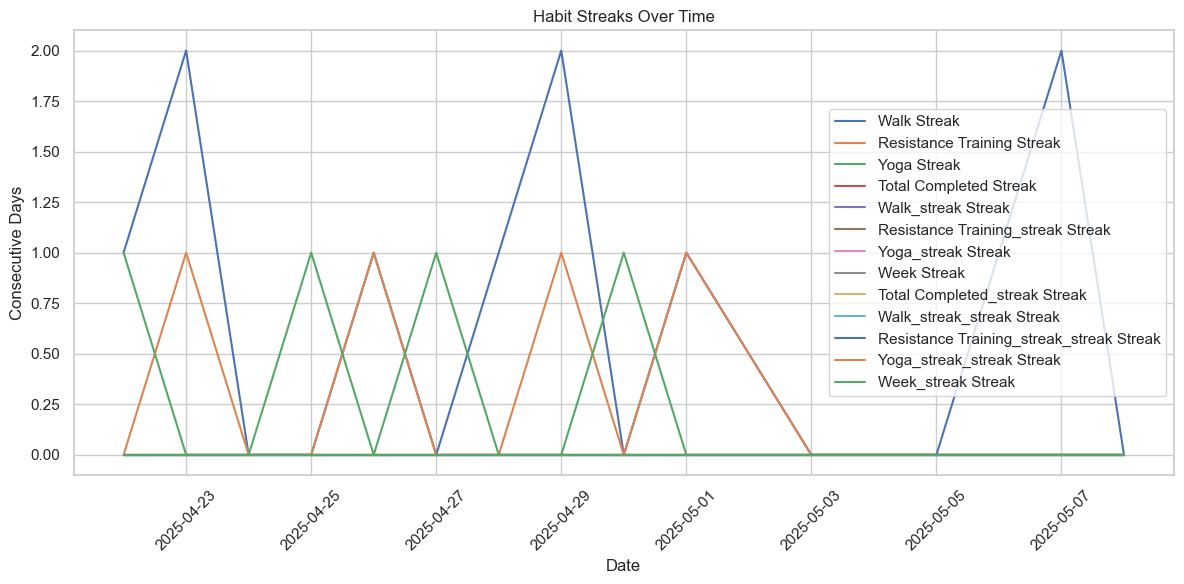

In [27]:
generate_dashboard(df)